The main file is forked from dvgodoy/PyTorchStepByStep
### Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

<div dir="rtl">

## الگوریتم گرادیان کاهشی، مورد استفاده در آموزش شبکه‌های عصبی

برای جزییات بیشتر، مقاله زیر را ملاحظه فرمایید:
<br>
							امین‌طوسی، محمود (۱۳۹۹)،
							<a href="https://math-sci.ui.ac.ir/article_25351.html">
								کاربرد بسط تیلور در کاهش حجم شبکه‌های عصبی پیچشی برای طبقه‌بندی نقاشی‌های سبک
								امپرسیونیسم و مینیاتور.
							</a>
							نشریه ریاضی و جامعه،‌ ۵ (۱)،‌ ۱-۱۶.
</div>							 

## Regression

In [30]:
# This is needed to render the plots
from plots.utils import *

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [32]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Train-Validation-Test Split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [34]:

# # Shuffles the indices
# idx = np.arange(N)
# np.random.shuffle(idx)

# # Uses first 80 random indices for train
# train_idx = idx[:int(N*.8)]
# # Uses the remaining indices for validation
# val_idx = idx[int(N*.8):]

# # Generates train and validation sets
# x_train, y_train = x[train_idx], y[train_idx]
# x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <AxesSubplot:title={'center':'Generated Data - Test'}, xlabel='x', ylabel='y'>],
       dtype=object))

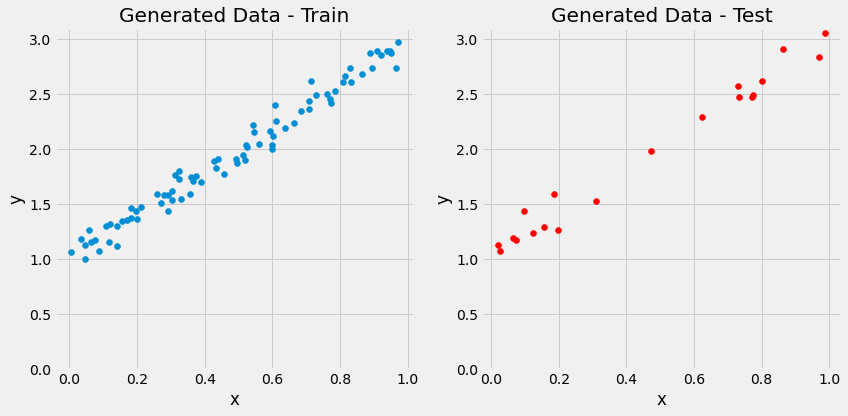

In [35]:
figure1(x_train, y_train, x_test, y_test)

## Step 0: Random Initialization

In [36]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [37]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

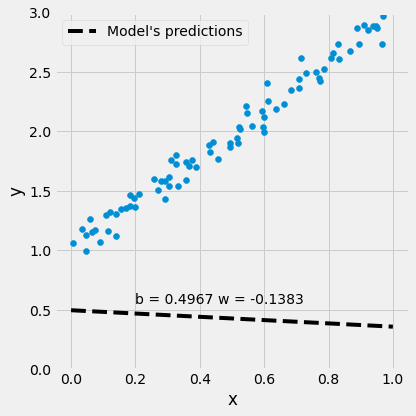

In [38]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large error_i = \hat{y_i} - y_i
$$

[2.36596945] [0.39881299]


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

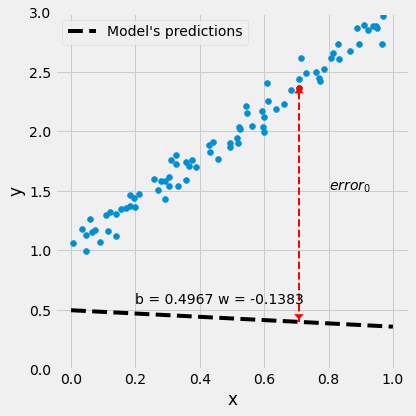

In [39]:
print(y_train[0], yhat[0])
figure3(x_train, y_train, b, w)

$$
\Large
\begin{aligned}
MSE &= \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [40]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.6401126993616817


### Loss Surface

In [41]:
bs, ws, all_losses = mesh_losses(true_b, true_w, x_train, y_train)

(<Figure size 864x432 with 2 Axes>,
 (<Axes3DSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>,
  <AxesSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>))

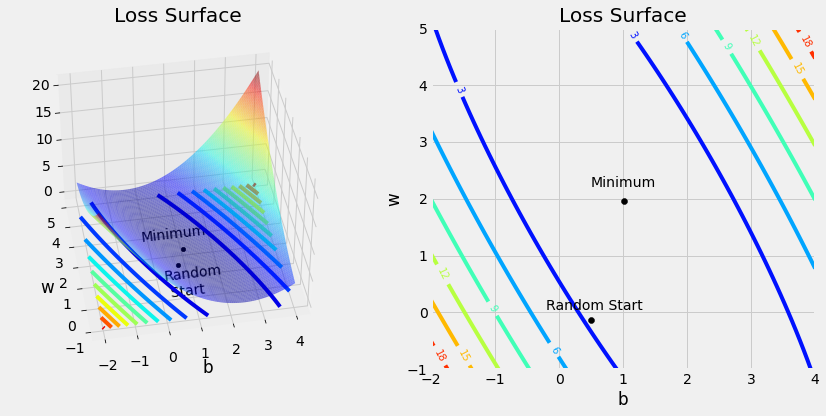

In [42]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

$$
\large
\begin{aligned}
\frac{\partial{MSE}}{\partial{b}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{MSE}}{\partial{w}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i) \cdot x_i} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}
\end{aligned}
$$

In [43]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.0224384959608583 -1.7706733515907813


### Visualizing the Gradients
For more details about gradient descent see github: dvgodoy/PyTorchStepByStep

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
& b = b - \eta \frac{\partial{MSE}}{\partial{b}}
\\
& w = w - \eta \frac{\partial{MSE}}{\partial{w}}
\end{aligned}
$$

In [44]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.798958] [0.03880303]


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

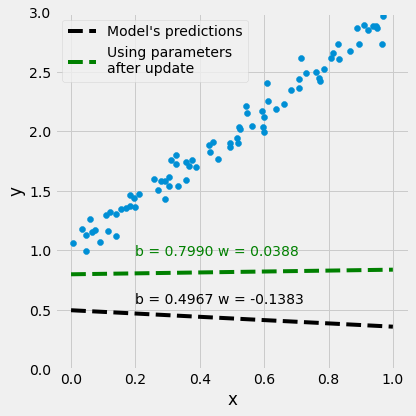

In [45]:
figure9(x_train, y_train, b, w)

## Step 5: Rinse and Repeat!

In [17]:
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
lr = 0.3
epochs = 50
Losses = np.empty(epochs)
for epoch in range(epochs):
    yhat = b + w * x_train
    error = (yhat - y_train)
    loss = (error ** 2).mean()
    Losses[epoch] = loss
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    b = b - lr * b_grad
    w = w - lr * w_grad

b, w    

(array([1.11648206]), array([1.75056848]))

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

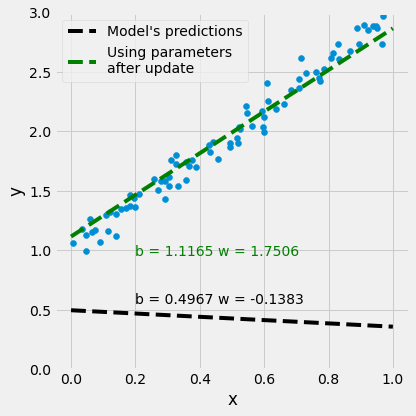

In [18]:
figure9(x_train, y_train, b, w)

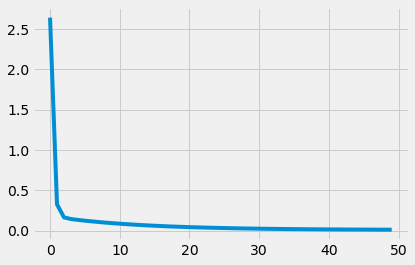

In [19]:
plt.plot(Losses)

## Using PyTorch auto grad

In [20]:
import torch
from torch import autograd
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = torch.tensor(b, requires_grad=True)
w = torch.tensor(w, requires_grad=True)
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)

In [21]:
lr = 0.3
epochs = 50
for epoch in range(epochs):
    yhat = b + w * x_train
    error = (yhat - y_train)
    loss = (error ** 2).mean()
    # محاسبه دستی مشتق را حذف کرده و به جاش مشتق خودکار را قرار می دهیم
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_train * error).mean()
    b_grad = autograd.grad(loss, b, create_graph=True)[0]
    w_grad = autograd.grad(loss, w)[0]
    b = b - lr * b_grad.item()
    w = w - lr * w_grad.item()

b, w  

(tensor([1.1165], dtype=torch.float64, grad_fn=<SubBackward0>),
 tensor([1.7506], dtype=torch.float64, grad_fn=<SubBackward0>))

Note: the following updating is wrong:

    b -= lr * b_grad.item()
    w -= lr * w_grad.item()

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

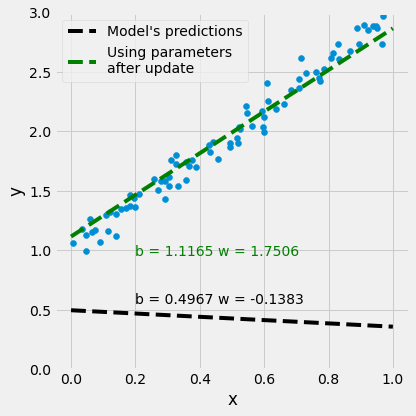

In [22]:
figure9(x_train, y_train, b, w)

In [23]:
loss

tensor(0.0109, dtype=torch.float64, grad_fn=<MeanBackward0>)

## Backward

Differntiationg using backward function

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [27]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = torch.tensor(b, requires_grad=True)
w = torch.tensor(w, requires_grad=True)
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)

lr = 0.3
epochs = 50
for epoch in range(epochs):
    yhat = b + w * x_train
    error = (yhat - y_train)
    loss = (error ** 2).mean()
    # loss = error.pow(2).sum()
    # محاسبه دستی مشتق را حذف کرده و به جاش مشتق خودکار را قرار می دهیم
    loss.backward()
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
        # Manually zero the gradients after updating weights
        b.grad = None
        w.grad = None

b, w  

(tensor([1.1165], dtype=torch.float64, requires_grad=True),
 tensor([1.7506], dtype=torch.float64, requires_grad=True))

بروزرسانی به صورت قبلی زیر موجب خطا خواهد شد و تنسور جدیدی بدون گرادیان خواهیم داشت.
باید عملیات به صورت

inplace

باشد

        b = b - lr * b.grad 
        w = w - lr * w.grad


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

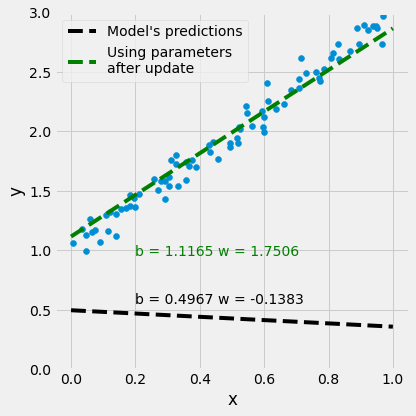

In [28]:
figure9(x_train, y_train, b, w)

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

PyTorch: Defining new autograd functions

PyTorch: nn module

PyTorch: optim

PyTorch: Custom nn Modules



In [60]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn 

# dtype = torch.float
# device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

x_train_t = torch.tensor(x_train.squeeze())
y_train_t = torch.tensor(y_train.squeeze())

model = nn.Linear(1,1)

learning_rate = 0.0001
f = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate )

num_epochs = 50
for epoch in range(num_epochs):
    #forward feed
    y_pred = model(x_train_t)

    #calculate the loss
    loss= f(y_pred, y_train_t)

    #backward propagation: calculate gradients
    loss.backward()

    #update the weights
    optimizer.step()

    #clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

    # predicted = model(X_train).detach().numpy()

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #3 'mat2' in call to _th_addmm_out

In [72]:
model(x[:80])
# x_train_t[0], x_train_t.shape
# x_train.squeeze().shape

RuntimeError: size mismatch, m1: [1 x 80], m2: [1 x 1] at C:\cb\pytorch_1000000000000\work\aten\src\TH/generic/THTensorMath.cpp:41

In [52]:
# -*- coding: utf-8 -*-
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 1036.09765625
3999 494.69061279296875
5999 239.64370727539062
7999 125.41011810302734
9999 66.19544982910156
11999 66.58635711669922
13999 22.333845138549805
15999 15.382553100585938
17999 11.94165325164795
19999 10.369565963745117
21999 9.595784187316895
23999 9.188055992126465
25999 9.006732940673828
27999 8.933928489685059
29999 8.87447452545166
Result: y = -0.006228665821254253 + 0.8552055954933167 x + 0.0005805884720757604 x^2 + -0.09331142157316208 x^3 + 9.544144995743409e-05 x^4 ? + 9.544144995743409e-05 x^5 ?


In [53]:
x.shape

torch.Size([2000])